#### René Ronaldo Godoy Mejía
#### Carnet 23005126

# Laboratorio: Análisis de Datos con Python

### Parte 1: Numpy:
#### Para los ejercicios siguiente genere el código que considere para resolver el problema que se le plantea.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [60]:
array_booleanos = np.array([True, False, True, ..., False], dtype=bool)

tamaño_bytes = array_booleanos.nbytes

print(f"Tamaño en bytes: {tamaño_bytes}")

Tamaño en bytes: 5


##### 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [62]:
array_pares = np.arange(1, 101)

array_pares = array_pares[array_pares % 2 == 0]

array_pares = array_pares[::-1]

print(array_pares[-10:])


[20 18 16 14 12 10  8  6  4  2]


##### 3) Dado el array
##### 2 4 5 6
##### 0 3 7 4
##### 8 8 5 2
##### 1 5 6 1

##### Seleccione con una instrucción el subarray de elementos
##### 0 3 7 4

##### Después, seleccione el subarray de elementos
##### 2 5
##### 8 5

In [63]:
array_original = np.array([[2, 4, 5, 6],
                          [0, 3, 7, 4],
                          [8, 8, 5, 2],
                          [1, 5, 6, 1]])

subarray_1 = array_original[1, 1:4]

subarray_2 = array_original[2, [0, 2]]

print("Subarray 1:", subarray_1)
print("Subarray 2:", subarray_2)

Subarray 1: [3 7 4]
Subarray 2: [8 5]


##### 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [64]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

diferencia = a - b

media_aritmetica = np.mean(diferencia)

print("La media aritmética de los arrays a y b es:", media_aritmetica)

La media aritmética de los arrays a y b es: -0.25


##### 5) Tengo valores de cordenadas (x, y) en las columnas del array
##### 1.33 4.5
##### 30.0 10.7
##### 70.2 0.5

##### Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [65]:
array_coordenadas = np.array([[1.33, 4.5],
                               [30.0, 10.7],
                               [70.2, 0.5]])

nueva_coordenada = np.array([37.1, -3.6])

array_coordenadas_nuevo = np.append(array_coordenadas, [nueva_coordenada], axis=0)

print(f"Las dimensiones del nuevo array son: {array_coordenadas_nuevo.shape}")


Las dimensiones del nuevo array son: (4, 2)


##### 6) Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [66]:
array_coordenadas = np.array([[1.33, 4.5],
                               [30.0, 10.7],
                               [70.2, 0.5]])

array_coordenadas_copia = array_coordenadas.copy()

array_coordenadas_copia = array_coordenadas_copia.T

nueva_coordenada_1 = np.array([10.8, 3.0])
nueva_coordenada_2 = np.array([35.8, 12.0])

array_coordenadas_copia = np.append(array_coordenadas_copia, [nueva_coordenada_1, nueva_coordenada_2], axis=1)

print(array_coordenadas_copia)


[[ 1.33 30.   70.2  10.8   3.  ]
 [ 4.5  10.7   0.5  35.8  12.  ]]


### Parte 2: Exploración y Minería de Datos:

In [67]:
#cargamos datos desde un archivo .csv
dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


##### 1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

Total de Municipios que tienen más de 100,000 habitantes: 62


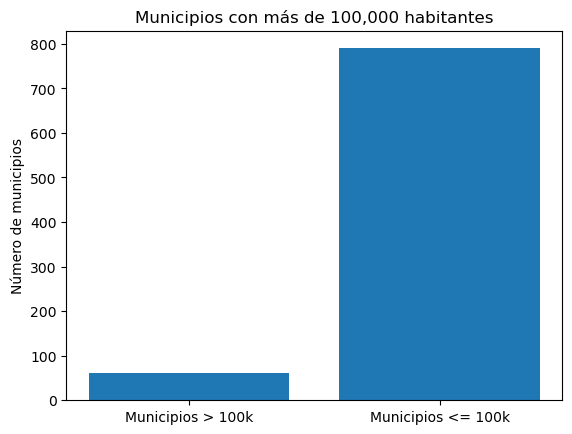

In [68]:
municipios_100k = dataset[dataset['Poblacion'] > 100000]

num_municipios_100k = len(municipios_100k)

print("Total de Municipios que tienen más de 100,000 habitantes:", num_municipios_100k)

plt.bar(["Municipios > 100k", "Municipios <= 100k"], [num_municipios_100k, len(dataset) - num_municipios_100k])
plt.title("Municipios con más de 100,000 habitantes")
plt.ylabel("Número de municipios")
plt.show()


##### 2) Realice una gráfica de barras sobre la poblacion de cada municipio, ordenela de menor a mayo y responda:

##### a. ¿Cuál es la segunda ciudad más poblada?
##### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

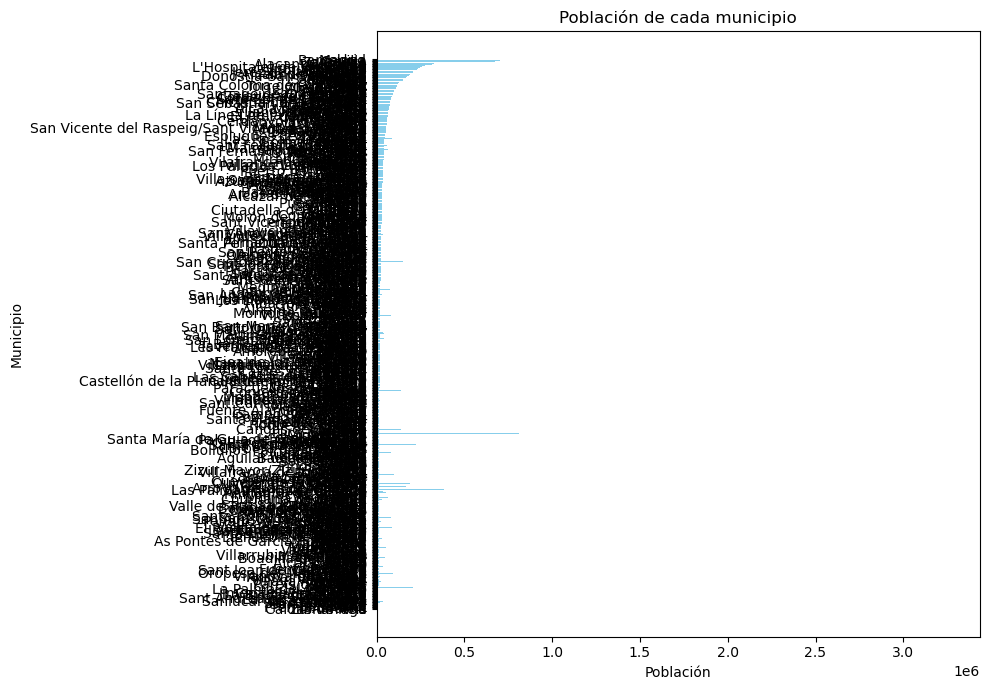

a. La segunda ciudad más poblada es: Barcelona
b. En el ranking de las ciudades más pobladas, Granada ocupa la posición número: 273


In [69]:
data = dataset.sort_values(by='Poblacion', ascending=True)

plt.figure(figsize=(10, 7))
plt.barh(data['Municipio'], data['Poblacion'], color='skyblue')
plt.xlabel('Población')
plt.ylabel('Municipio')
plt.title('Población de cada municipio')
plt.tight_layout()
plt.show()

# a. ¿Cuál es la segunda ciudad más poblada?
segunda_ciudad = data.iloc[-2]['Municipio']
print("a. La segunda ciudad más poblada es:", segunda_ciudad)

# b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
granada = data[data['Municipio'] == 'Granada'].index[0] + 1
print("b. En el ranking de las ciudades más pobladas, Granada ocupa la posición número:", granada)


##### 3) ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?.

El número de municipios de Navarra con más de 5000 habitantes es de: 11


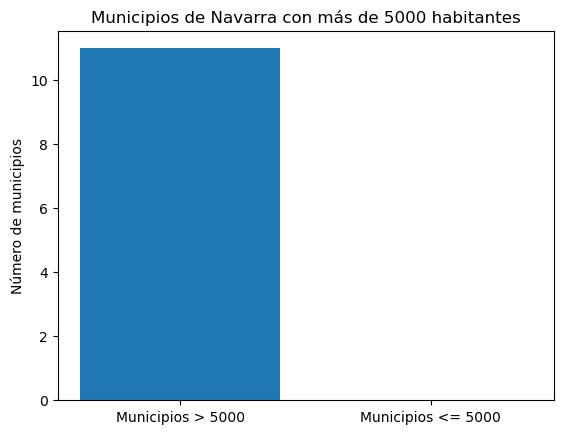

In [70]:
municipios_navarra = dataset[dataset['Provincia'] == 'Navarra']

municipios_5000 = municipios_navarra[municipios_navarra['Poblacion'] > 5000]

num_municipios_5000 = len(municipios_5000)

print("El número de municipios de Navarra con más de 5000 habitantes es de:", num_municipios_5000)

plt.bar(["Municipios > 5000", "Municipios <= 5000"], [num_municipios_5000, len(municipios_navarra) - num_municipios_5000])
plt.title("Municipios de Navarra con más de 5000 habitantes")
plt.ylabel("Número de municipios")
plt.show()

##### 4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

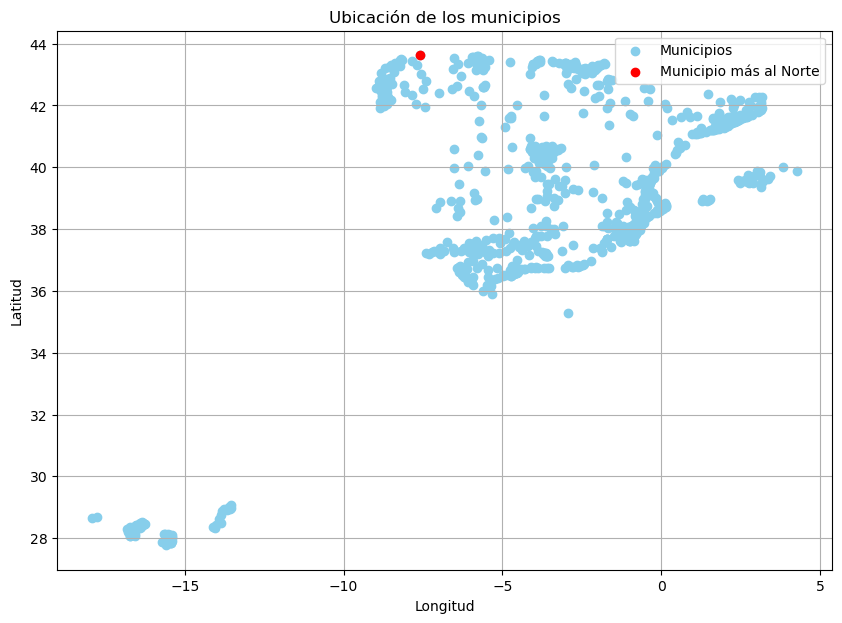

El municipio más al Norte es: Viveiro
Su provincia es: Lugo
Y su población es de: 16211.0


In [71]:
municipio = dataset.sort_values(by='Y', ascending=False).iloc[0]

latitud = municipio['Y']
longitud = municipio['X']

plt.figure(figsize=(10, 7))
plt.scatter(dataset['X'], dataset['Y'], color='skyblue', label='Municipios')
plt.scatter(longitud, latitud, color='red', label='Municipio más al Norte')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación de los municipios')
plt.legend()
plt.grid(True)
plt.show()

print("El municipio más al Norte es:", municipio['Municipio'])
print("Su provincia es:", municipio['Provincia'])
print("Y su población es de:", municipio['Poblacion'])


##### 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

Media: 30217.85
Mediana: 17526.0
Desviación estándar: 50355.49171459277
Valor máximo: 239154.0
Valor mínimo: 10386.0


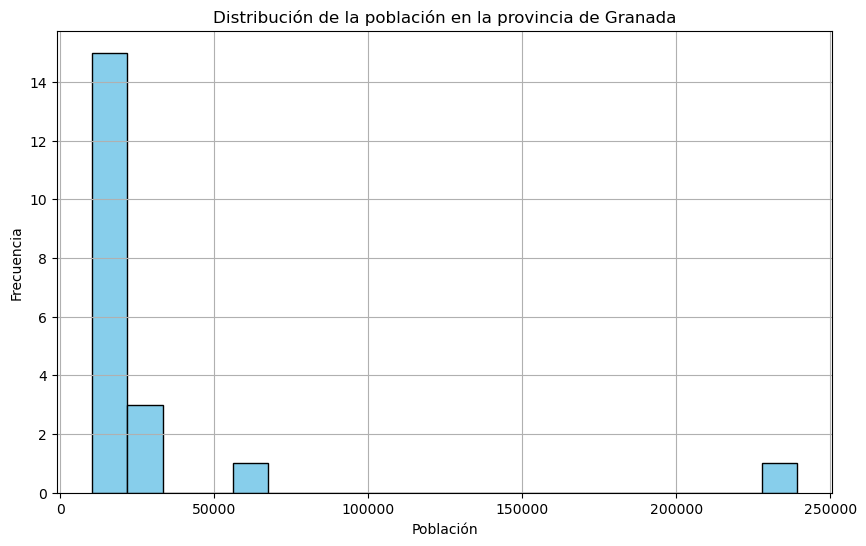

In [72]:
municipios_granada = dataset[dataset['Provincia'] == 'Granada']

media = municipios_granada['Poblacion'].mean()
mediana = municipios_granada['Poblacion'].median()
desviacion_estandar = municipios_granada['Poblacion'].std()
valor_maximo = municipios_granada['Poblacion'].max()
valor_minimo = municipios_granada['Poblacion'].min()

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_estandar)
print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

plt.figure(figsize=(10, 6))
plt.hist(municipios_granada['Poblacion'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la población en la provincia de Granada')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


##### 6) Realice un histograma con la población de los Municipios para cada una de las provincias.

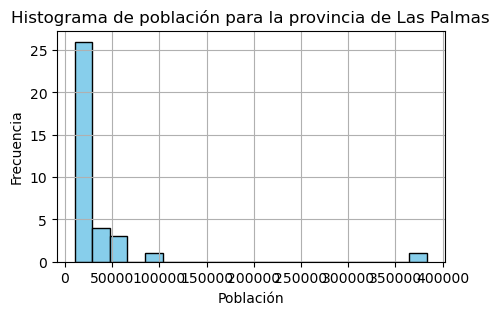

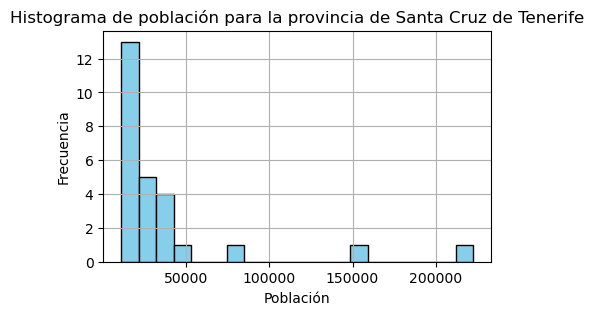

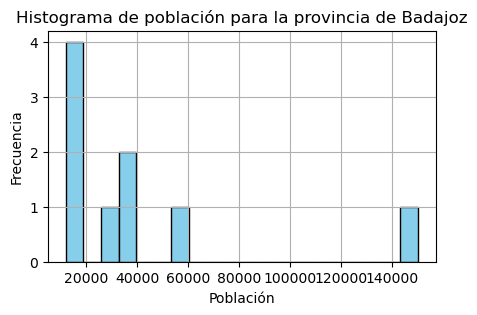

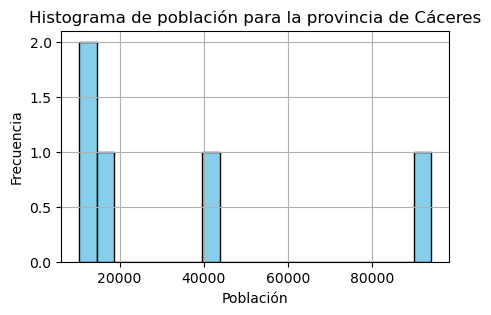

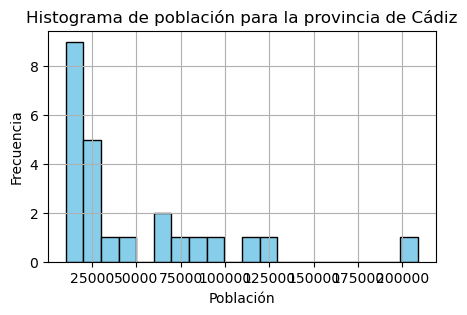

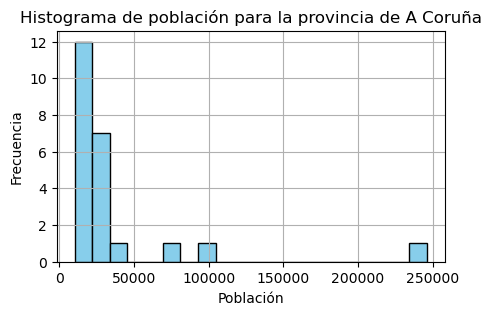

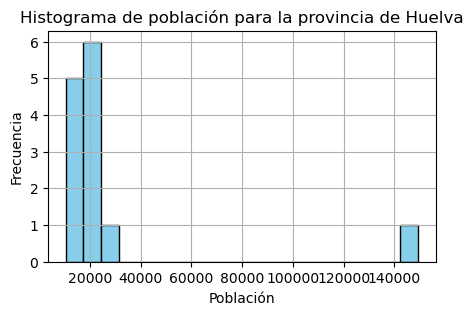

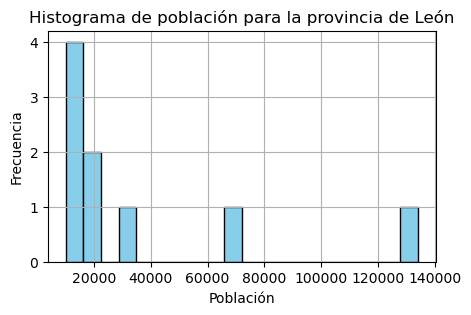

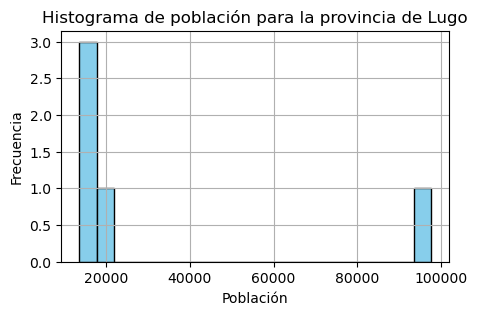

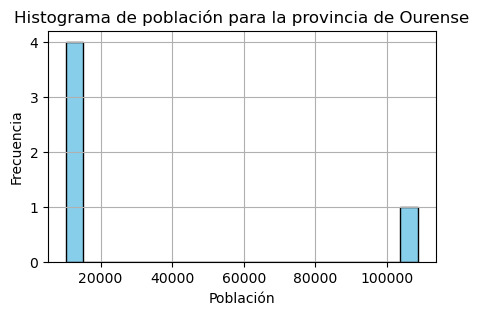

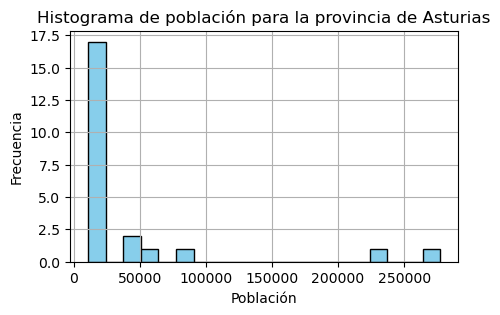

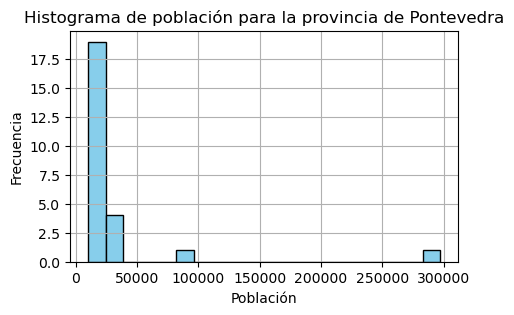

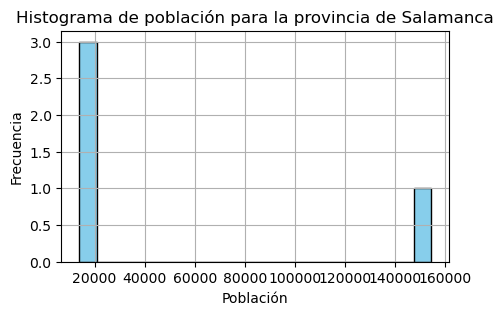

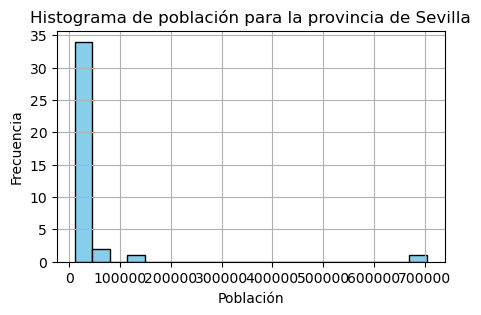

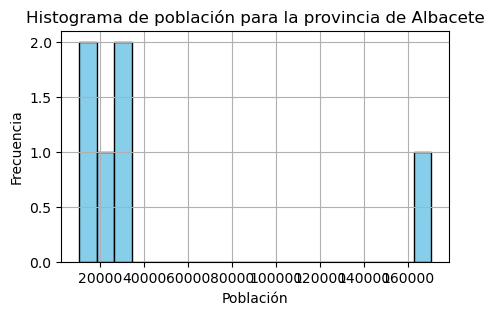

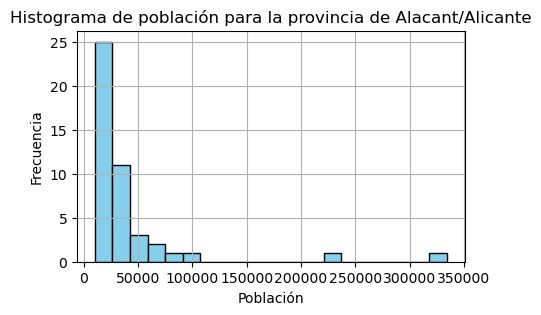

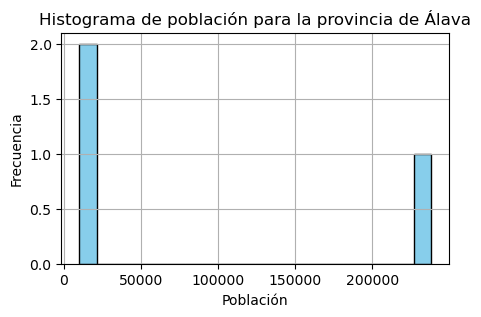

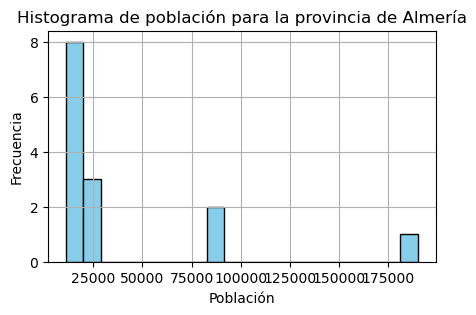

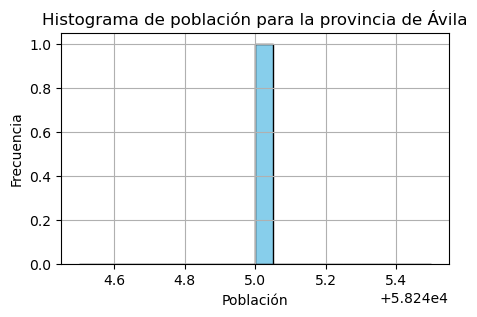

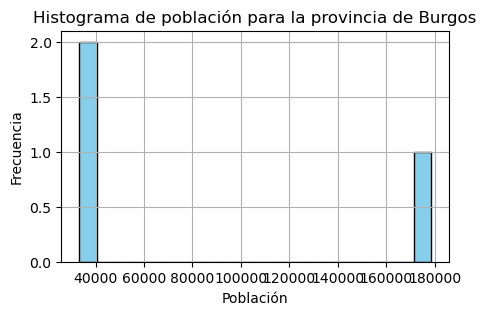

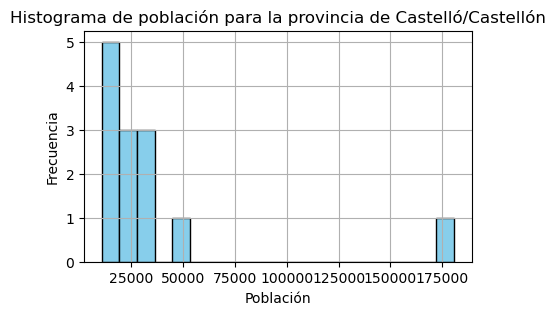

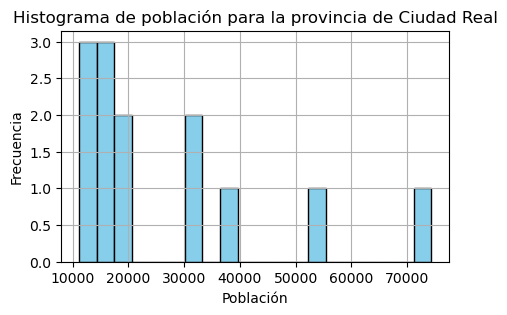

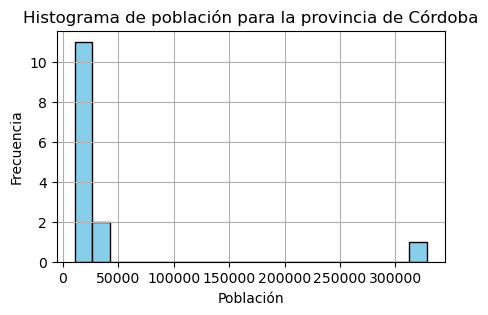

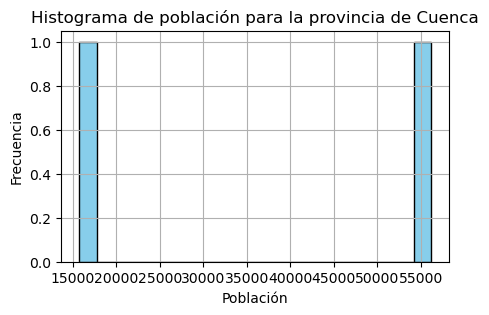

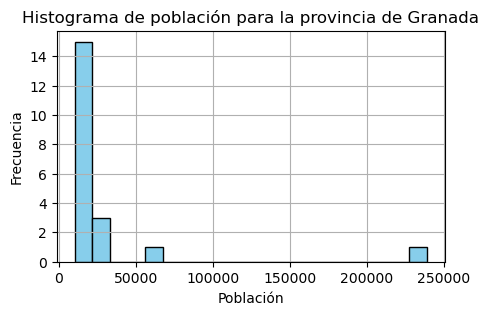

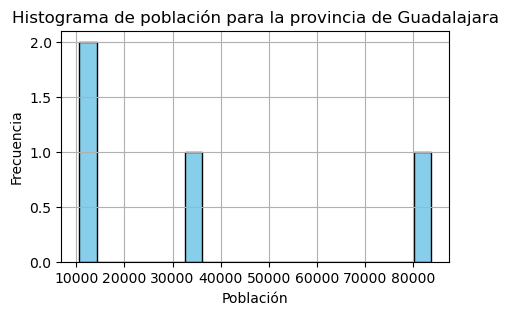

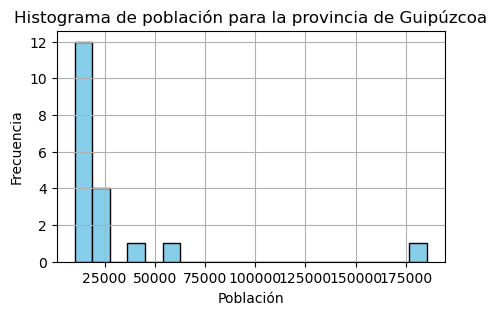

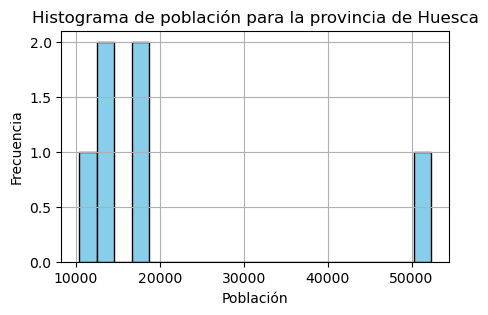

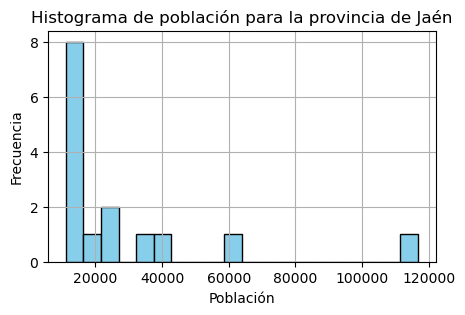

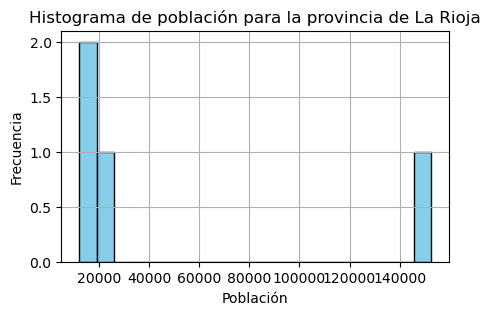

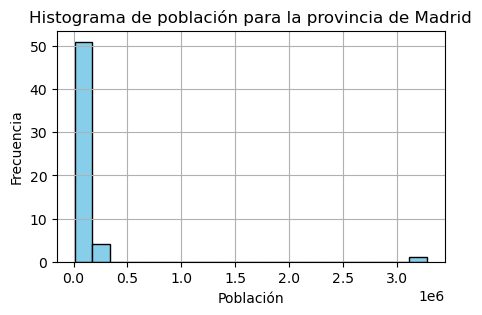

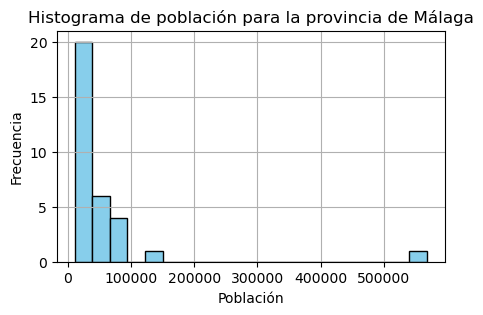

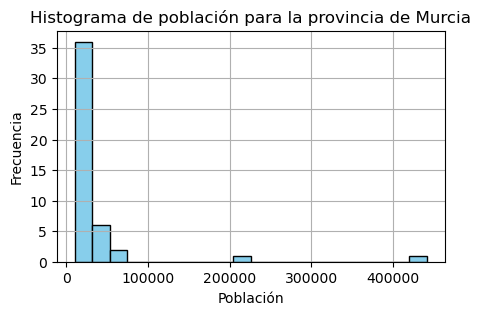

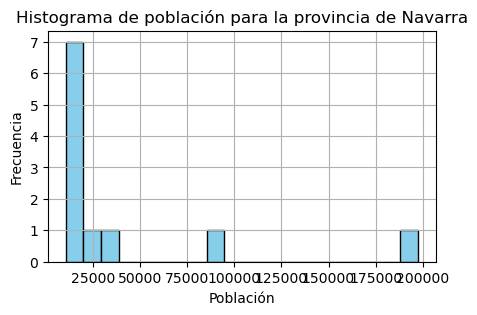

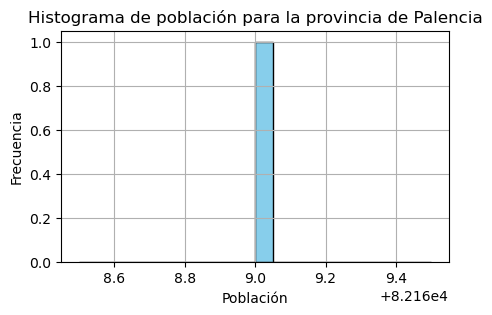

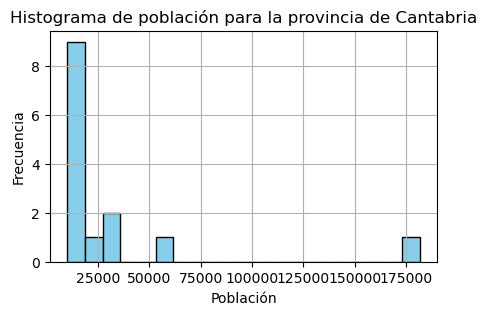

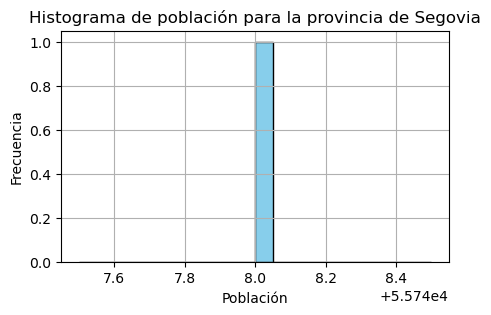

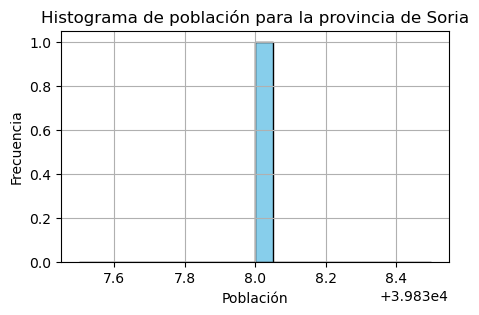

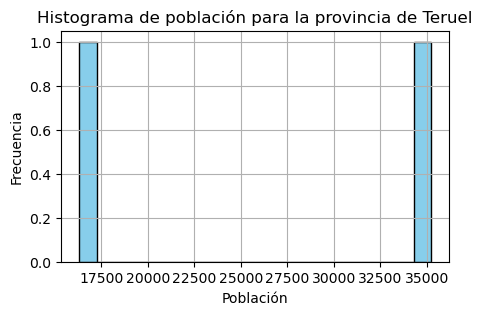

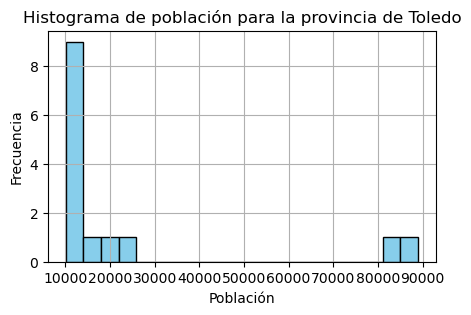

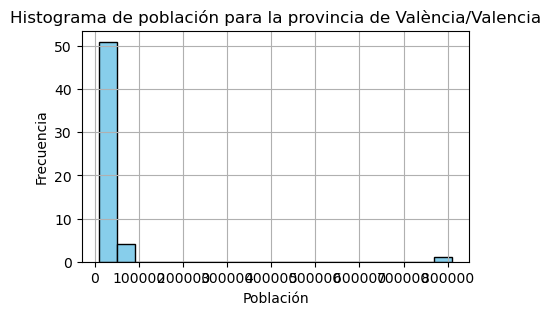

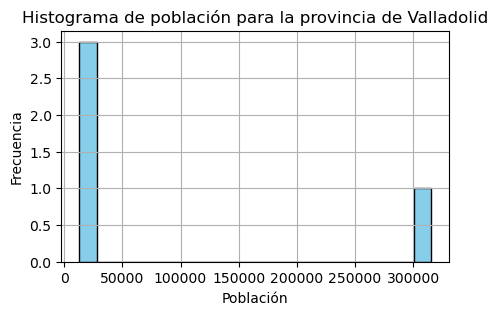

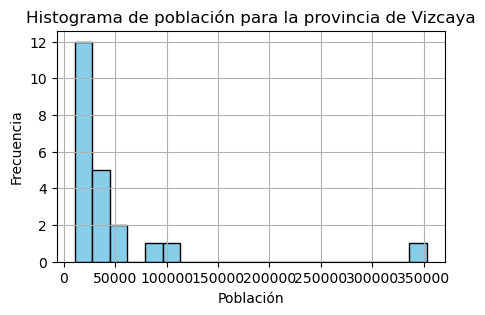

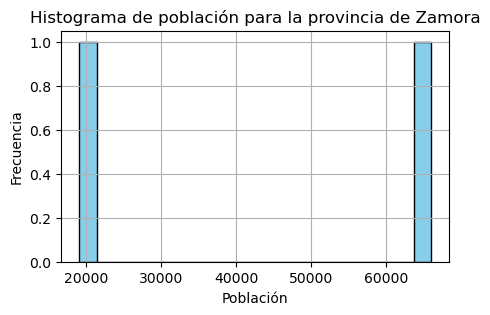

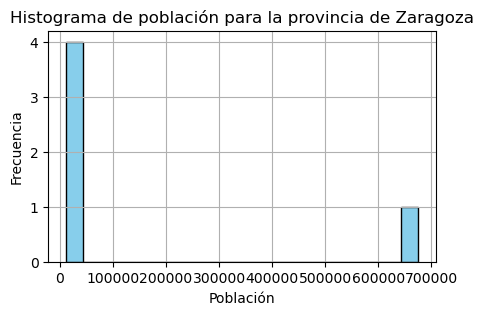

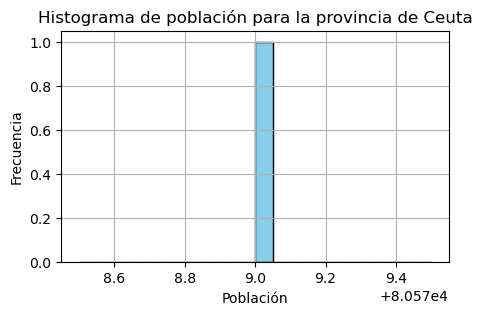

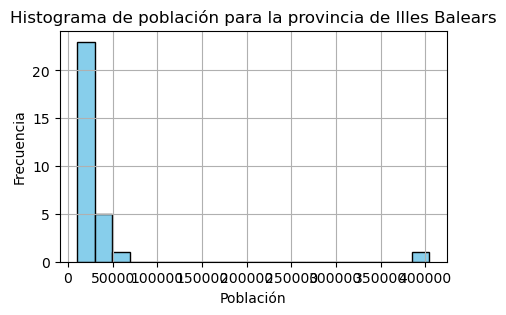

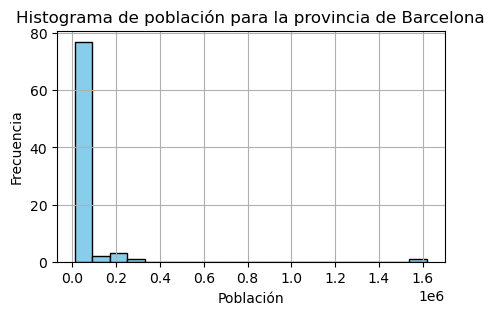

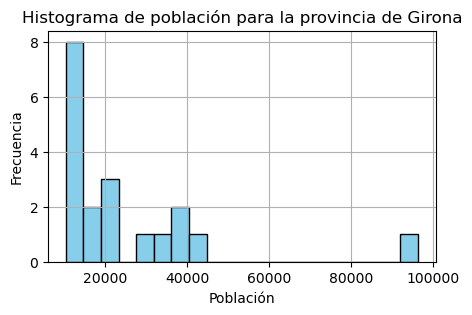

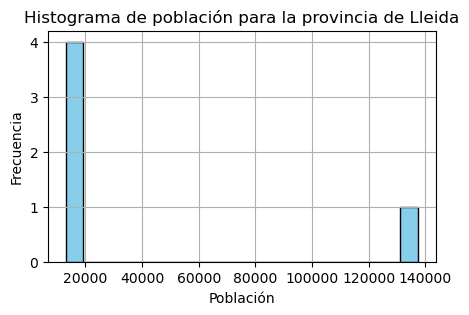

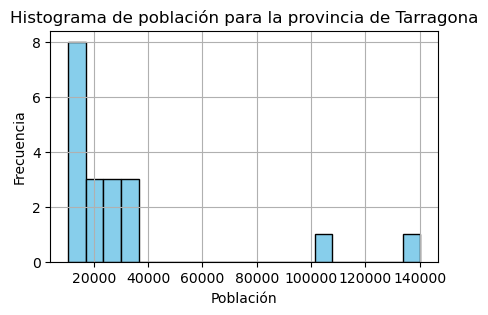

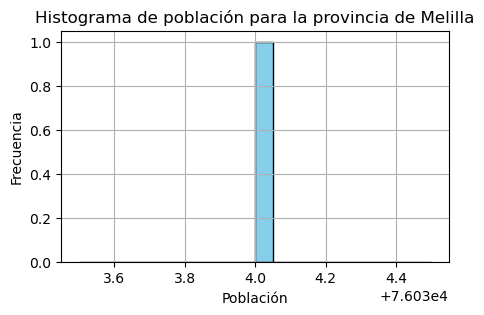

In [77]:
target = 'Poblacion'

for provincia in dataset['Provincia'].unique():
    plt.figure(figsize=(5, 3))
    plt.hist(dataset[dataset['Provincia'] == provincia][target], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de población para la provincia de {provincia}')
    plt.xlabel('Población')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


##### 7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

Promedio de la población de los 50 municipios seleccionados al azar: 62286.02
Desviación estándar de la población de los 50 municipios seleccionados al azar: 127629.56539420591


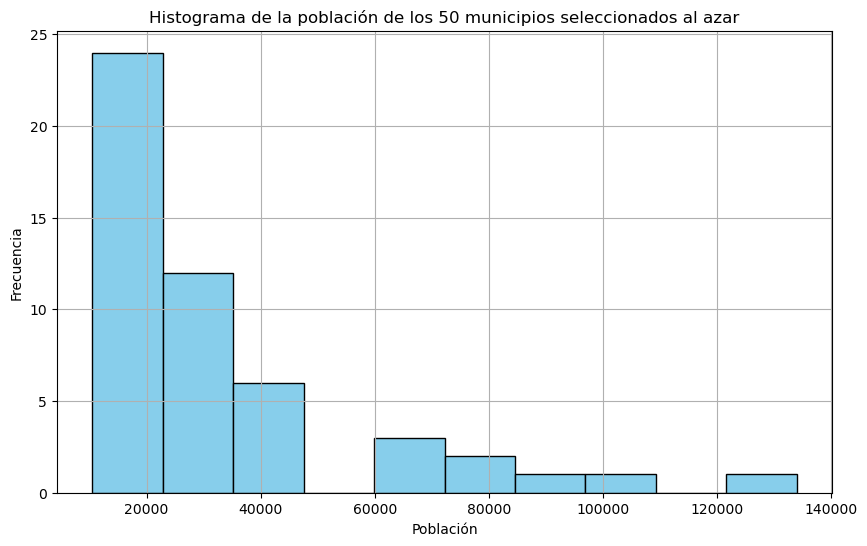

In [73]:
municipios_aleatorios = dataset.sample(n=50, replace=False)

promedio = municipios_aleatorios['Poblacion'].mean()
desviacion_estandar = municipios_aleatorios['Poblacion'].std()

print("Promedio de la población de los 50 municipios seleccionados al azar:", promedio_poblacion)
print("Desviación estándar de la población de los 50 municipios seleccionados al azar:", desviacion_estandar_poblacion)

plt.figure(figsize=(10, 6))
plt.hist(municipios_aleatorios['Poblacion'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de la población de los 50 municipios seleccionados al azar')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


##### 8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

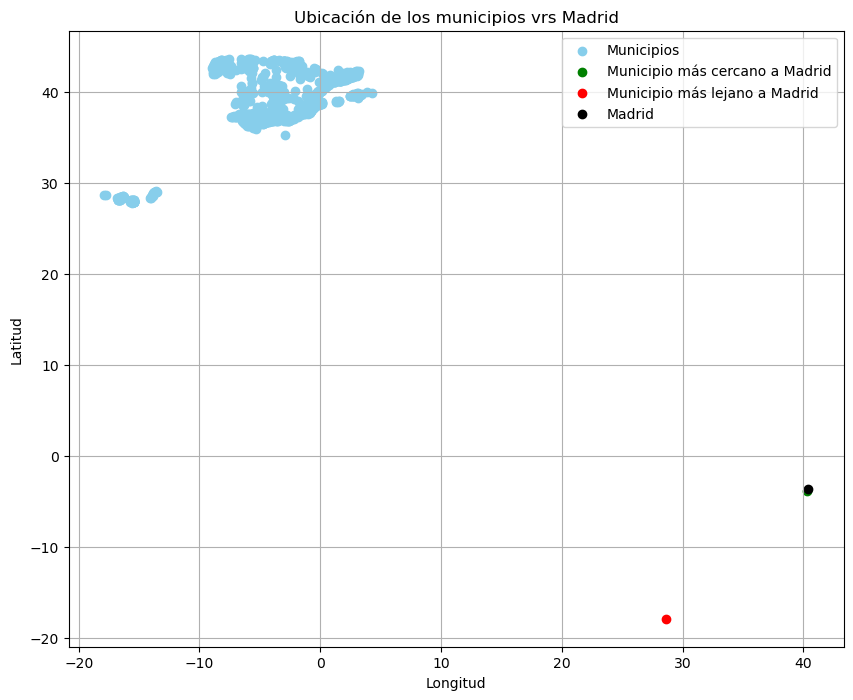

Municipio más cercano a Madrid: Móstoles
Municipio más lejano a Madrid: Los Llanos de Aridane


In [74]:
madrid_coords = (40.4168, -3.7038)  # Latitud y longitud de Madrid

distancias = []
for index, row in dataset.iterrows():
    if row['Municipio'] != 'Madrid':  
        municipio_coords = (row['Y'], row['X'])  
        distancia = np.sqrt((madrid_coords[0] - municipio_coords[0])**2 + (madrid_coords[1] - municipio_coords[1])**2)
        distancias.append(distancia)

municipio_mas_cercano = np.argmin(distancias)
municipio_mas_lejano = np.argmax(distancias)

coords_mas_cercano = (dataset.iloc[municipio_mas_cercano]['Y'], dataset.iloc[municipio_mas_cercano]['X'])
coords_mas_lejano = (dataset.iloc[municipio_mas_lejano]['Y'], dataset.iloc[municipio_mas_lejano]['X'])


plt.figure(figsize=(10, 8))
plt.scatter(dataset['X'], dataset['Y'], color='skyblue', label='Municipios')
plt.scatter(*coords_mas_cercano, color='green', label='Municipio más cercano a Madrid')
plt.scatter(*coords_mas_lejano, color='red', label='Municipio más lejano a Madrid')
plt.scatter(*madrid_coords, color='black', label='Madrid')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación de los municipios vrs Madrid')
plt.legend()
plt.grid(True)
plt.show()


nombre_municipio_mas_cercano = dataset.iloc[municipio_mas_cercano]['Municipio']
nombre_municipio_mas_lejano = dataset.iloc[municipio_mas_lejano]['Municipio']
print("Municipio más cercano a Madrid:", nombre_municipio_mas_cercano)
print("Municipio más lejano a Madrid:", nombre_municipio_mas_lejano)
